In [53]:
import pandas as pd
df = pd.read_csv('Comment_origin.csv')

In [54]:
len(df)

7685

In [55]:
df

,title,username,date,star,comment
0,無名鹹粥,女子的休假計劃愛食記部落客(875篇食記),2022/08/07,4.0,台北：台北三大紅燒肉之一與台北三大肉粥店之一
1,無名鹹粥,阿球出任務愛食記部落客(101篇食記),2022/06/09,999.0,汀洲路無名鹹粥，好吃紅燒肉推薦
2,無名鹹粥,布咕布咕美食小天地愛食記部落客(2356篇食記),2022/05/19,999.0,無名鹹粥-沒有店名沒有招牌卻有超大份量的美味鹹粥店
3,無名鹹粥,Darren蘋果樹旅遊玩樂誌愛食記部落客(1930篇食記),2022/04/13,999.0,台北鹹粥|汀洲路無名鹹粥/沒招牌南機場海鮮粥紅燒肉雞捲(菜單)
4,無名鹹粥,Nash，神之領域愛食記部落客(3036篇食記),2022/01/12,999.0,汀洲路無名鹹粥，南機場夜市美推薦 (菜單)
...,...,...,...,...,...
7680,郝家食堂,徐葑絮(6則評論),2018/10/12,5.0,蒜味燒雞不錯
7681,郝家食堂,Maruko與美食有個約會愛食記部落客(1396篇食記),2017/06/11,999.0,中正紀念堂週邊蒜味燒雞飯一吃過就難忘
7682,郝家食堂,Wisely的拍拍照寫寫字愛食記部落客(1960篇食記),2015/11/12,999.0,郝家堂＠寧波西街裡的蒜味燒雞和排骨飯，捷運中正紀念堂站美
7683,波麗士美食廣場,Chun Chun(1則評論),2018/10/03,5.0,美味的餐點、親切的服務、大推👍🏻👍🏻👍🏻


In [56]:
df.groupby('title').count().sort_values(['comment'],ascending=False)

,username,date,star,comment
title,,,,
瓦法奇朵,149,149,149,147
雙月食品社 青島店,140,140,140,140
阜杭豆漿,85,85,85,85
添好運 HOYII北車站店,78,78,78,77
肥前屋,72,72,72,69
...,...,...,...,...
老爺爺葡式蛋塔,1,1,1,1
"台北時代寓所 Hotel Resonance Taipei, Tapestry Collection by Hilton",1,1,1,1
台北喜來登大飯店,1,1,1,1


In [57]:
df1 = df['comment']
df1.to_csv('pandas.txt', header=None, index=None, sep='\t')

In [58]:
import jieba
#jieba.load_userdict("dict.txt.big.tw")
jieba.add_word("CP值")
jieba.add_word("必比登")

In [59]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from wordcloud import WordCloud
#from scipy.misc import imread
from collections import Counter
import matplotlib.pyplot as plt

data={}
text_file = open('pandas.txt','r',encoding='utf-8')      #  開啟文件
text_list = text_file.read()

In [61]:
punctuation = set()
with open ('punctuation_zh_tw.txt', 'r',encoding='utf-8') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
with open ('punctuation_en.txt', 'r',encoding='utf-8') as f:
    for line in f.readlines():
        punctuation.add(line.strip())
punctuation.add('\n')
punctuation.add(' ')
print(punctuation)

{'？', '『', '~', '「', '|', ')', '│', '’', '_', '）', '。', '、', '#', '.', "'", '!', '-', '，', '…', '．', '》', '·', '──', '〕', '～', ' ', '(', '❤', '《', '?', ']', '{', '“', '/', '！', '｜', '】', ':', '\n', '：', '–', '（', '‘', '；', '"', '”', '』', ';', '@', '✖', '︱', '」', '〔', '【', ',', '...', '—', '[', '*', '}'}


In [62]:
with open('stopwords_zh_tw.txt',encoding='utf-8') as file:    #加入停用詞表
    stopwords = {line.strip() for line in file}

In [63]:
word_list = [word for word in jieba.cut(text_list, cut_all=False) if word not in punctuation and word not in stopwords]

In [64]:
word_list

['台北',
 '台北',
 '三大紅',
 '燒肉',
 '之一',
 '與',
 '台北',
 '三',
 '大肉',
 '粥',
 '店',
 '之一',
 '汀洲',
 '路無名',
 '鹹',
 '粥',
 '好吃',
 '紅燒',
 '肉',
 '推薦',
 '無名',
 '鹹',
 '粥',
 '店名',
 '招牌',
 '超大',
 '份量',
 '美味',
 '鹹',
 '粥',
 '店',
 '台北',
 '鹹',
 '粥',
 '汀洲',
 '路無名',
 '鹹',
 '粥',
 '招牌',
 '南機場',
 '海鮮',
 '粥',
 '紅燒',
 '肉',
 '雞',
 '捲',
 '菜單',
 '汀洲',
 '路無名',
 '鹹',
 '粥',
 '南機場',
 '夜市',
 '美',
 '推薦',
 '菜單',
 '汀洲',
 '路無名',
 '鹹',
 '粥',
 '南機場',
 '夜市',
 '附近',
 '招牌',
 '小攤',
 '竟然',
 '台北',
 '三',
 '大肉',
 '粥',
 '店',
 '台北',
 '中正',
 '汀洲',
 '路無名',
 '鹹',
 '粥',
 '海鮮',
 '粥',
 '紅燒',
 '肉',
 '雞',
 '捲',
 '汀州',
 '路無名',
 '肉',
 '粥',
 '傳統',
 '古',
 '早味',
 '小吃',
 '紅燒',
 '肉炸雞',
 '捲',
 '炸功',
 '厲害',
 '近南',
 '機場',
 '夜市',
 '汀州',
 '路無名',
 '鹹',
 '粥',
 '依舊',
 '人氣',
 '汀洲',
 '路無名',
 '鹹',
 '粥',
 '中正',
 '區',
 '中式',
 '早',
 '午餐',
 '推薦',
 '好吃',
 '紅燒',
 '肉',
 '雞',
 '捲',
 '海鮮',
 '粥',
 '汀洲',
 '路無名',
 '鹹',
 '粥',
 '台北',
 '美味',
 '紅燒',
 '肉',
 '姊姊',
 '台北',
 '中正',
 '區',
 '汀州',
 '路無名',
 '鹹',
 '粥',
 '－',
 '－',
 '現包',
 '現炸',
 '熱騰騰',
 '雞',
 '捲',
 '讓',
 '人',
 '驚艷',
 '金黃',
 

In [65]:
for word in word_list: 
    if len(word)>=2:
        if not data.__contains__(word):
            data[word]=0
        data[word]+=1
data

{'台北': 2672,
 '三大紅': 1,
 '燒肉': 67,
 '之一': 34,
 '大肉': 3,
 '汀洲': 18,
 '路無名': 10,
 '好吃': 1044,
 '紅燒': 45,
 '推薦': 1068,
 '無名': 18,
 '店名': 5,
 '招牌': 80,
 '超大': 35,
 '份量': 173,
 '美味': 473,
 '南機場': 291,
 '海鮮': 67,
 '菜單': 198,
 '夜市': 225,
 '附近': 93,
 '小攤': 3,
 '竟然': 23,
 '中正': 913,
 '汀州': 23,
 '傳統': 68,
 '早味': 59,
 '小吃': 282,
 '肉炸雞': 1,
 '炸功': 1,
 '厲害': 29,
 '近南': 2,
 '機場': 18,
 '依舊': 18,
 '人氣': 147,
 '中式': 35,
 '午餐': 289,
 '姊姊': 51,
 '現包': 2,
 '現炸': 6,
 '熱騰騰': 4,
 '驚艷': 15,
 '金黃': 4,
 '酥脆': 60,
 '表皮': 2,
 '軟綿': 2,
 '餡料': 21,
 '成驚人': 1,
 '反比': 1,
 '一段': 18,
 '90': 19,
 '號無名': 1,
 'KAKIGORI': 1,
 'TOSHIHIKO': 1,
 '日式': 328,
 '刨冰': 41,
 '俊彥': 1,
 '日本': 258,
 '冰與洋': 1,
 '果子': 3,
 '相遇': 4,
 '師大美': 3,
 '奶油': 42,
 '起司': 111,
 '柑橘': 2,
 '萊姆': 1,
 '葡萄': 4,
 '超棒': 8,
 'Kakigori': 2,
 'Toshihiko': 1,
 '一家': 35,
 '環境': 87,
 '令人': 37,
 '寵物': 40,
 '友善': 44,
 '誠心': 1,
 '冰品': 48,
 '醬料': 8,
 '真的': 174,
 '水果': 33,
 '打成': 1,
 '咖哩': 163,
 '推建議': 1,
 '一起': 62,
 '搭配': 77,
 '古亭': 176,
 'KAKIGORITOSHIHIKO': 2,
 '焙茶'

In [66]:
import csv
key_count = dict(sorted(data.items(), key=lambda item: item[1], reverse = True))
with open('key_count.csv','w') as f:
    w = csv.writer(f)
    for i in key_count.items():
      w.writerow(i)

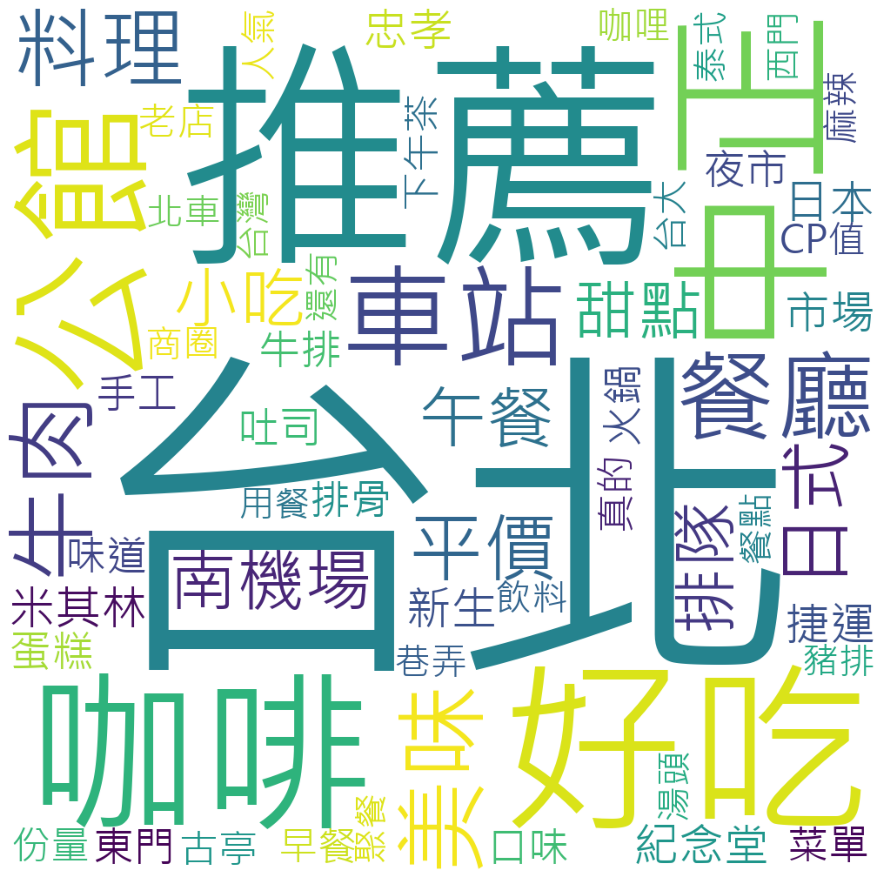

In [67]:
from wordcloud import WordCloud

my_wordcloud = WordCloud(  
    background_color='white',  
    max_words=60,  
    font_path=r'MicrosoftJhengHeiRegular.ttf',   #字體
    width=1000,
    height=1000
).generate_from_frequencies(data)

plt.figure(figsize=(18,16))
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()  
my_wordcloud.to_file('result.jpg')
text_file.close()